# Simple Linear Regression

Importing the libraries

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


 Importing the dataset

In [111]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [112]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size =0.2 , random_state=0)

Training the Simple Linear Regression model on the Training set

In [113]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [114]:
y_pred=regressor.predict(X_test)

# Multiple Linear regression

Splitting the dataset into the Training set and Test set

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [116]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [117]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 44275.93  60000.  ]
 [543473.58 500000.  ]]


#Polynomial regression

Training the Linear Regression model on the whole dataset

In [118]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

Training the Polynomial Regression model on the whole dataset

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

Visualising the Linear Regression results

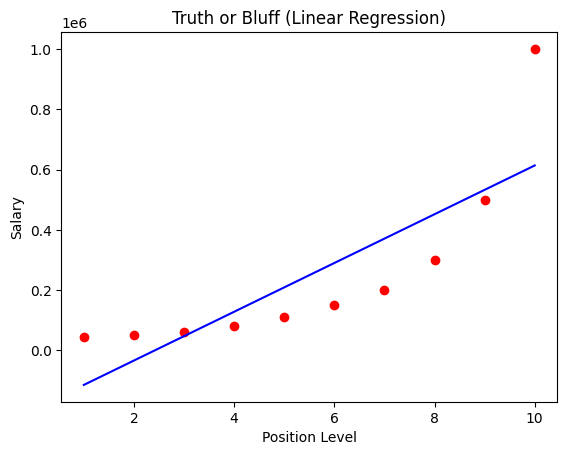

In [120]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the Polynomial Regression results

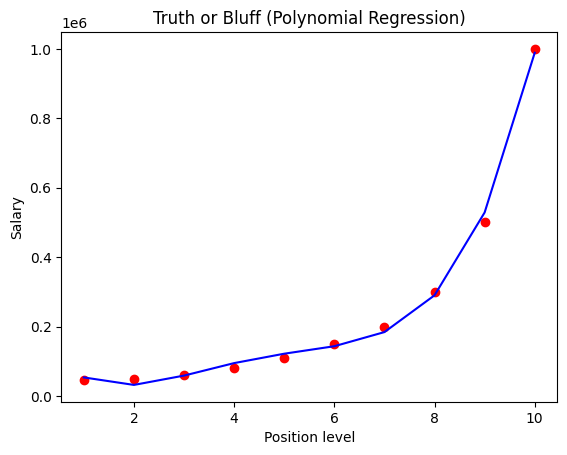

In [121]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Visualising the Polynomial Regression results (for higher resolution and smoother curve)

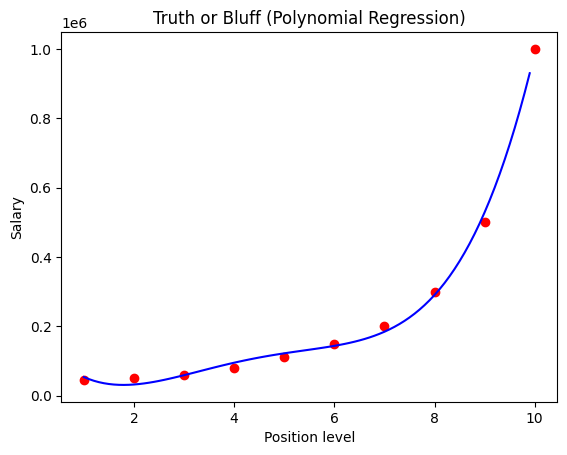

In [122]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

 Predicting a new result with Linear Regression

In [123]:
lin_reg.predict([[6.5]])

array([330378.79])

Predicting a new result with Polynomial Regression

In [124]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

Training the SVR model on the whole dataset


In [125]:
y = y.reshape(len(y),1)

Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [127]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [128]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[90752.75]])

Visualising the SVR results

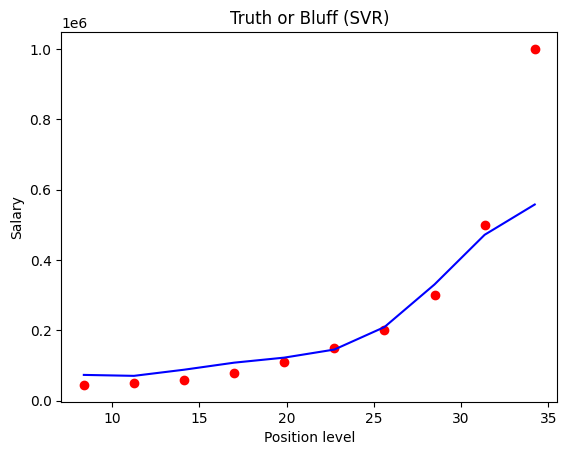

In [129]:
plt.scatter(sc_X.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Visualising the SVR results (for higher resolution and smoother curve)

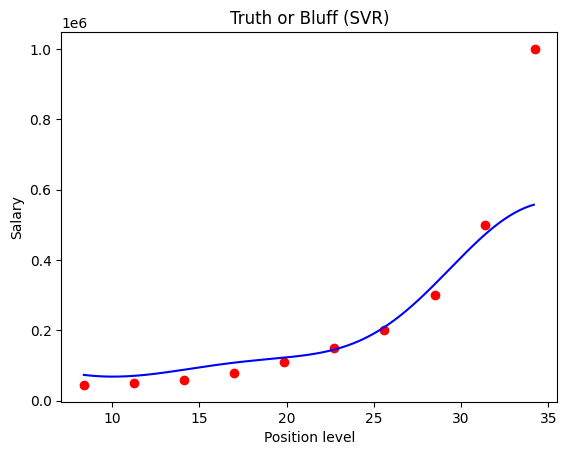

In [130]:
X_grid = np.arange(min(sc_X.inverse_transform(x)), max(sc_X.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Training the Decision Tree Regression model on the whole dataset

In [131]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

# Predicting a new result

In [132]:
regressor.predict([[6.5]])

array([-0.35])

Visualising the Decision Tree Regression results (higher resolution)

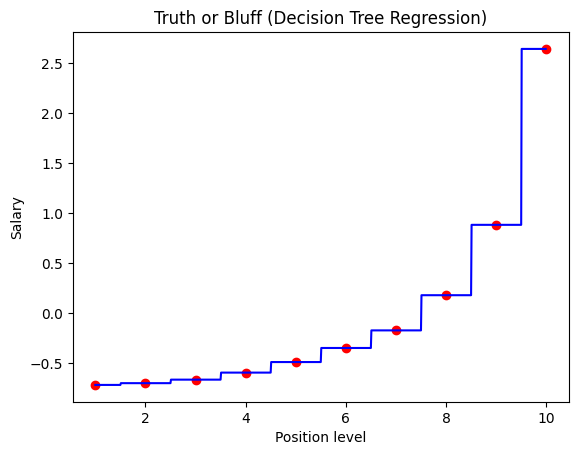

In [133]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#Training the Random Forest Regression model on the whole dataset

In [139]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

<ipython-input-139-b0ae24ff6f2d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, random_state=0)

#Predicting a new result

In [140]:
regressor.predict([[6.5]])

array([-0.29])

Visualising the Random Forest Regression results (higher resolution)

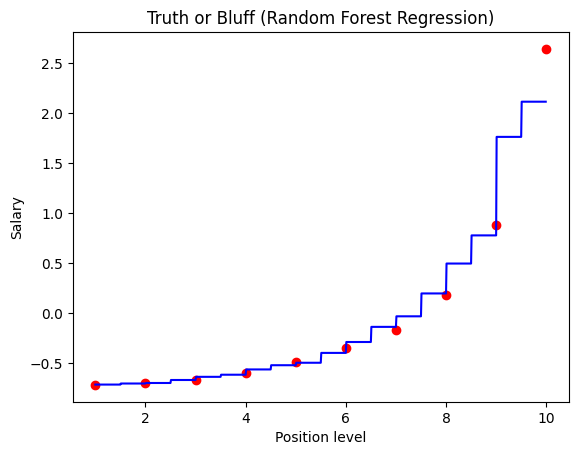

In [141]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()